# Introduction to Pandas an other libraries

(Many thanks to Evimaria Terzi and Mark Crovella for their code and examples)

## Python

In this tutorial we will see Python Data Analysis library, as well as other libraries useful for data processing.

I assume that you all know Python. A brief introduction to Python Basics can be found in this notebook from last year (<a href = "http://www.cs.uoi.gr/~tsap/teaching/2017-cse012/slides/Intro-to-Python.ipynb">ipynb</a>, <a href = "http://www.cs.uoi.gr/~tsap/teaching/2017-cse012/slides/Intro-to-Python.html">html</a>). Here we will only review the use of list comprehension

### List Comprehension

Recall the mathematical notation:

$$L_1 = \left\{x^2 : x \in \{0\ldots 9\}\right\}$$

$$L_2 = \left(1, 2, 4, 8,\ldots, 2^{12}\right)$$

$$M = \left\{x \mid x \in L_1 \text{ and } x \text{ is even}\right\}$$


In [1]:
L1 = [x**2 for x in range(10)] # range(n): returns an iterator over the numbers 0,...,n-1
L2 = [2**i for i in range(13)]
L3 = [x for x in L1 if x % 2 == 0]
print (L1)
print (L2) 
print (L3)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
[0, 4, 16, 36, 64]


In [2]:
[x for x in [x**2 for x in range(10)] if x % 2 == 0]

[0, 4, 16, 36, 64]

In [3]:
words = 'The quick brown fox jumps over the lazy dog'.split()
print(words) 
upper = [w.upper() for w in words]
print(upper)
stuff = [[w.upper(), w.lower(), len(w)] for w in words]
print(stuff)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]


In [4]:
s = input('Give numbers separated by comma: ')
x = [int(n) for n in s.split(',')]
print(x)

Give numbers separated by comma: 1,2,3
[1, 2, 3]


In [6]:
#create a vector of all 10 zeros
z = [0 for i in range(10)]
print(z)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
#create a 10x10 matrix with all 0s
M = [[0 for i in range(10)] for j in range(10)]

#set the diagonal to 1
for i in range(10): M[i][i] = 1
M

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [9]:
#create a list of random integers in [0,99]
import random
R = [random.choice(range(100)) for i in range(10)]
print(R)

[56, 93, 73, 24, 81, 73, 99, 44, 14, 22]


In [10]:
# Removing elements from a list while you iterate it can lead to problems
L = [1,2,4,5,6,8]
for x in L:
    if x%2 == 0:
        L.remove(x)
print(L)

[1, 4, 5, 8]


In [11]:
#Another way to do this:
L = [1,2,4,5,6,8]
L = [x for x in L if x%2 == 1] #creates a new list
L[:] = [x for x in L if x%2 == 1]
print(L)

[1, 5]


In [12]:
L = [1,2,4,5,6,8]
R =[y for y in L if y%2 == 0]
for x in R: L.remove(x)
print(L)

[1, 5]


## Pandas

Pandas is the Python Data Analysis Library. 

Pandas is an extremely versatile tool for manipulating datasets, mostly tabular data. You can think of Pandas as the evolution of excel spreadsheets, with more capabilities for coding, and SQL queries such as joins and group-by.   

It also produces high quality plots with matplotlib, and integrates nicely with other libraries that expect NumPy arrays.

You can find more details <a href = https://pandas.pydata.org/>here</a>

The most important tool provided by Pandas is the **data frame.**

A data frame is a table in which each row and column is given a label. Very similar to a spreahsheet or a SQL table.

Pandas DataFrames are documented at: http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html

## Getting started

In [13]:
import pandas as pd #The pandas library
import pandas_datareader.data as web # For accessing web data
from pandas import Series, DataFrame #Main pandas data structures

import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl

import seaborn as sns #A more fancy plotting library

from datetime import datetime #For handling dates

import scipy as sp #library for scientific computations 
from scipy import stats #The statistics part of the library

#pd.__version__

#For presenting plots inline
%matplotlib inline 

## Fetching, storing and retrieving your data

For demonstration purposes, we'll use a library built-in to Pandas that fetches data from standard online sources. More information on what types of data you can fetch is at:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html


We will use stock quotes from IEX. To make use of these you need to first create an account and obtain an API key. Then you set the environment variable IEX_API_KEY to the value of the key as it is snown below

In [14]:
import os
os.environ["IEX_API_KEY"] = "pk_******************************"

In [15]:
stocks = 'FB'
data_source = 'iex'
start = datetime(2018,1,1)
end = datetime(2018,12,31)

stocks_data = web.DataReader(stocks, data_source, start, end)

#If you want to load only some of the attributes:
#stocks_data = web.DataReader(stocks, data_source, start, end)[['open','close']]

stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 5 columns):
open      251 non-null float64
high      251 non-null float64
low       251 non-null float64
close     251 non-null float64
volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


In [16]:
stocks_data.head()

open    high     low   close    volume
date                                                
2018-01-02  177.68  181.58  177.55  181.42  18151903
2018-01-03  181.88  184.78  181.33  184.67  16886563
2018-01-04  184.90  186.21  184.10  184.33  13880896
2018-01-05  185.59  186.90  184.93  186.85  13574535
2018-01-08  187.20  188.90  186.33  188.28  17994726

Note that the date attribute is the index of the rows, not an attribute.

In [17]:
#trying to access the date column will give an error

stocks_data.date

AttributeError: 'DataFrame' object has no attribute 'date'

Use <tt>describe</tt> to get some basic statistics for the data

In [18]:
stocks_data.describe()

open        high         low       close        volume
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean   171.454582  173.615339  169.303147  171.510956  2.768798e+07
std     19.683521   19.423868   20.074371   19.977452  1.922117e+07
min    123.100000  129.740000  123.020000  124.060000  9.588587e+06
25%    157.815000  160.745000  155.525000  157.915000  1.782839e+07
50%    174.890000  176.980000  172.830000  174.700000  2.186093e+07
75%    184.890000  186.450000  183.420000  185.270000  3.031384e+07
max    215.720000  218.620000  214.270000  217.500000  1.698037e+08

### Reading data from a .csv file

In [19]:
stocks_data.to_csv('stocks_data.csv')
for x in open('stocks_data.csv').readlines()[0:10]:
    print(x.strip()) 

date,open,high,low,close,volume
2018-01-02,177.68,181.58,177.55,181.42,18151903
2018-01-03,181.88,184.78,181.33,184.67,16886563
2018-01-04,184.9,186.21,184.1,184.33,13880896
2018-01-05,185.59,186.9,184.93,186.85,13574535
2018-01-08,187.2,188.9,186.33,188.28,17994726
2018-01-09,188.7,188.8,187.1,187.87,12393057
2018-01-10,186.94,187.89,185.63,187.84,10529894
2018-01-11,188.4,188.4,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.4,179.37,77551299


The index values are also printed in the file, together with the column name

In [50]:
df = pd.read_csv('stocks_data.csv')
df.head()

date    open    high     low   close    volume
0  2018-01-02  177.68  181.58  177.55  181.42  18151903
1  2018-01-03  181.88  184.78  181.33  184.67  16886563
2  2018-01-04  184.90  186.21  184.10  184.33  13880896
3  2018-01-05  185.59  186.90  184.93  186.85  13574535
4  2018-01-08  187.20  188.90  186.33  188.28  17994726

Note that in the new dataframe, there is now a date column, while the index values are numbers 0,1,...

The number of rows in the DataFrame:

In [21]:
len(df)

251

Getting the attribute characteristics

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
date     251 non-null object
open     251 non-null float64
high     251 non-null float64
low      251 non-null float64
close    251 non-null float64
vol      251 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.8+ KB


### Other ways to define data frames

In [22]:
d = {'A':[1., 2., 3., 4.],
     'B':[4., 3., 2., 1.]}  

ddf = pd.DataFrame(d)

In [23]:
ddf.to_csv('test.csv')
print(open('test.csv').read())

,A,B
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0



In [24]:
d = [[1,2,3],[4,5,6]]
test_df = pd.DataFrame(d)
print(test_df)
test_df.columns= ['A','B','C']
test_df.index = ['one','two']
test_df

   0  1  2
0  1  2  3
1  4  5  6


A  B  C
one  1  2  3
two  4  5  6

## Working with data columns

The columns or "features" in your data

In [25]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

We can also assign a list to the columns property in order to change the attribute names.

Alternatively, you can change the name of an attribute using <tt>rename</tt>: 

<tt>df = df.rename(columns = {'volume':'vol'})</tt>

In [26]:
df.columns = ['date', 'open', 'high', 'low', 'close', 'vol']
df.head()

date    open    high     low   close       vol
0  2018-01-02  177.68  181.58  177.55  181.42  18151903
1  2018-01-03  181.88  184.78  181.33  184.67  16886563
2  2018-01-04  184.90  186.21  184.10  184.33  13880896
3  2018-01-05  185.59  186.90  184.93  186.85  13574535
4  2018-01-08  187.20  188.90  186.33  188.28  17994726

Selecting a single column from your data

In [27]:
df['open']

0      177.68
1      181.88
2      184.90
3      185.59
4      187.20
5      188.70
6      186.94
7      188.40
8      178.06
9      181.50
10     179.26
11     178.13
12     180.85
13     180.80
14     186.05
15     189.89
16     187.95
17     187.75
18     188.75
19     183.01
20     188.37
21     188.22
22     192.04
23     186.93
24     178.57
25     184.15
26     181.01
27     174.76
28     177.06
29     175.62
        ...  
221    142.33
222    141.07
223    137.61
224    127.03
225    134.40
226    133.65
227    133.00
228    135.75
229    136.28
230    135.92
231    138.26
232    143.00
233    140.73
234    133.82
235    139.25
236    139.60
237    143.88
238    143.08
239    145.57
240    143.34
241    143.08
242    141.08
243    141.21
244    130.70
245    133.39
246    123.10
247    126.00
248    132.44
249    135.34
250    134.45
Name: open, Length: 251, dtype: float64

Another way of selecting a single column from your data

In [28]:
df.open

0      177.68
1      181.88
2      184.90
3      185.59
4      187.20
5      188.70
6      186.94
7      188.40
8      178.06
9      181.50
10     179.26
11     178.13
12     180.85
13     180.80
14     186.05
15     189.89
16     187.95
17     187.75
18     188.75
19     183.01
20     188.37
21     188.22
22     192.04
23     186.93
24     178.57
25     184.15
26     181.01
27     174.76
28     177.06
29     175.62
        ...  
221    142.33
222    141.07
223    137.61
224    127.03
225    134.40
226    133.65
227    133.00
228    135.75
229    136.28
230    135.92
231    138.26
232    143.00
233    140.73
234    133.82
235    139.25
236    139.60
237    143.88
238    143.08
239    145.57
240    143.34
241    143.08
242    141.08
243    141.21
244    130.70
245    133.39
246    123.10
247    126.00
248    132.44
249    135.34
250    134.45
Name: open, Length: 251, dtype: float64

In [29]:
df[['open','close']].head()

open   close
0  177.68  181.42
1  181.88  184.67
2  184.90  184.33
3  185.59  186.85
4  187.20  188.28

In [30]:
df.date.head(10)

0    2018-01-02
1    2018-01-03
2    2018-01-04
3    2018-01-05
4    2018-01-08
5    2018-01-09
6    2018-01-10
7    2018-01-11
8    2018-01-12
9    2018-01-16
Name: date, dtype: object

In [31]:
df.date.tail(10)

241    2018-12-17
242    2018-12-18
243    2018-12-19
244    2018-12-20
245    2018-12-21
246    2018-12-24
247    2018-12-26
248    2018-12-27
249    2018-12-28
250    2018-12-31
Name: date, dtype: object

We can use the <tt>values</tt> method to obtain the values of one or more attributes.
It returns a numpy array. You can trasform it into a list, by applying the list() operator.

In [32]:
df.open.values

array([177.68, 181.88, 184.9 , 185.59, 187.2 , 188.7 , 186.94, 188.4 ,
       178.06, 181.5 , 179.26, 178.13, 180.85, 180.8 , 186.05, 189.89,
       187.95, 187.75, 188.75, 183.01, 188.37, 188.22, 192.04, 186.93,
       178.57, 184.15, 181.01, 174.76, 177.06, 175.62, 173.45, 180.5 ,
       178.99, 175.77, 176.71, 178.7 , 179.9 , 184.58, 184.45, 182.3 ,
       179.01, 173.29, 176.2 , 181.78, 178.74, 183.56, 183.91, 185.23,
       185.61, 182.6 , 183.24, 184.49, 177.01, 167.47, 164.8 , 166.13,
       165.44, 160.82, 156.31, 151.65, 155.15, 157.81, 156.55, 152.03,
       161.56, 157.73, 157.82, 157.93, 165.36, 166.98, 164.58, 165.72,
       165.83, 166.88, 166.2 , 167.79, 167.27, 165.43, 160.14, 173.22,
       176.81, 173.79, 172.  , 174.25, 175.13, 173.08, 177.35, 178.25,
       179.67, 183.15, 184.85, 187.71, 184.88, 183.7 , 182.68, 183.49,
       183.77, 184.93, 182.5 , 185.88, 186.02, 184.34, 186.54, 187.87,
       193.07, 191.84, 194.3 , 191.03, 190.75, 187.53, 188.81, 192.17,
      

## Data Frame methods

A DataFrame object has many useful methods.

In [33]:
df.mean()

open     1.714546e+02
high     1.736153e+02
low      1.693031e+02
close    1.715110e+02
vol      2.768798e+07
dtype: float64

In [34]:
df.std()

open     1.968352e+01
high     1.942387e+01
low      2.007437e+01
close    1.997745e+01
vol      1.922117e+07
dtype: float64

In [35]:
df.median()

open          174.89
high          176.98
low           172.83
close         174.70
vol      21860931.00
dtype: float64

In [36]:
df.open.mean()

171.45458167330676

In [37]:
df.high.mean()

173.61533864541832

### Plotting methods

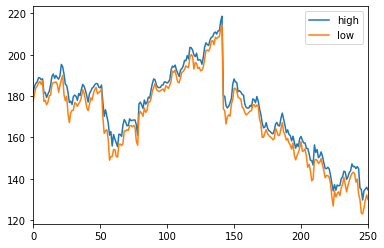

In [38]:
df.high.plot()
df.low.plot(label='low')
plt.legend(loc='best') #puts the ledgent in the best possible position

### Histograms

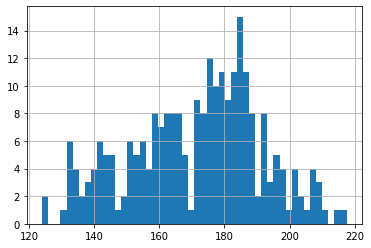

In [39]:
df.close.hist(bins=50)

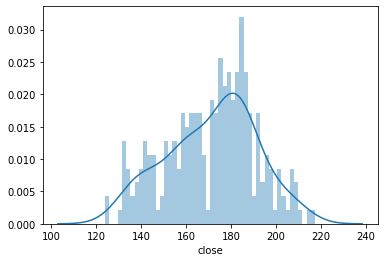

In [40]:
sns.distplot(df.close,bins=50)

### Bulk Operations

Methods like **sum( )** and **std( )** work on entire columns. 

We can run our own functions across all values in a column (or row) using **apply( )**.

In [42]:
df.date.head()

0    2018-01-02
1    2018-01-03
2    2018-01-04
3    2018-01-05
4    2018-01-08
Name: date, dtype: object

The **values** property of the column returns a list of values for the column. Inspecting the first value reveals that these are strings with a particular format.

In [43]:
first_date = df.date.values[0]
first_date
#returns a string

'2018-01-02'

In [44]:
datetime.strptime(first_date, "%Y-%m-%d")

datetime.datetime(2018, 1, 2, 0, 0)

We will now make use of two operations:

The **apply** method takes a dataframe and applies a function that is given as input to apply to all the entries in the data frame. In the case below we apply it to just one column.

The **lambda** function allows to define an anonymus function that takes some parameters (d) and uses them to compute some expression.

Using the lambda function with apply, we can apply the function to all the entries of the data frame (in this case the column values)

In [51]:
df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
df.date.head()

0   2018-01-02
1   2018-01-03
2   2018-01-04
3   2018-01-05
4   2018-01-08
Name: date, dtype: datetime64[ns]

Each row in a DataFrame is associated with an index, which is a label that uniquely identifies a row.

The row indices so far have been auto-generated by pandas, and are simply integers starting from 0. 

From now on we will use dates instead of integers for indices -- the benefits of this will show later. 

Overwriting the index is as easy as assigning to the **`index`** property of the DataFrame.

In [52]:
df.index = df.date
df.head()

date    open    high     low   close    volume
date                                                           
2018-01-02 2018-01-02  177.68  181.58  177.55  181.42  18151903
2018-01-03 2018-01-03  181.88  184.78  181.33  184.67  16886563
2018-01-04 2018-01-04  184.90  186.21  184.10  184.33  13880896
2018-01-05 2018-01-05  185.59  186.90  184.93  186.85  13574535
2018-01-08 2018-01-08  187.20  188.90  186.33  188.28  17994726

Now that we have made an index based on date, we can drop the original `date` column.
We will not do it in this example to use it later on.

In [47]:
df = df.drop(['date'],axis=1) #axis = 0 means rows, axis =1 means columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 5 columns):
open     251 non-null float64
high     251 non-null float64
low      251 non-null float64
close    251 non-null float64
vol      251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


### Accessing rows of the DataFrame

So far we've seen how to access a column of the DataFrame.  To access a row we use a different notation.

To access a row by its index value, use the **`.loc()`** method.

In [53]:
df.loc[datetime(2018,5,7)]

date      2018-05-07 00:00:00
open                   177.35
high                    179.5
low                    177.17
close                  177.97
volume               18697195
Name: 2018-05-07 00:00:00, dtype: object

To access a row by its sequence number (ie, like an array index), use **`.iloc()`** ('Integer Location')

In [54]:
df.iloc[10:30] #dataframe with rows from 10 to 30
df.iloc[0:2,[1,3]] #dataframe with rows 0:2, and the second and fourth columns

open     low
date                      
2018-01-02  177.68  177.55
2018-01-03  181.88  181.33

# To iterate over the rows, use **`.iterrows()`**

In [55]:
num_positive_days = 0
for idx, row in df.iterrows(): #returns the index name and the row
    if row.close > row.open:
        num_positive_days += 1
        
print("The total number of positive-gain days is {}.".format(num_positive_days))

The total number of positive-gain days is 130.


You can also do it this way:

In [56]:
num_positive_days = 0
for i in range(len(df)):
    row = df.iloc[i]
    if row.close > row.open:
        num_positive_days += 1
        
print("The total number of positive-gain days is {}.".format(num_positive_days))

The total number of positive-gain days is 130.


Or this way:

In [57]:
pos_days = [idx for (idx,row) in df.iterrows() if row.close > row.open]
print("The total number of positive-gain days is "+str(len(pos_days)))

The total number of positive-gain days is 130


## Filtering

It is very easy to select interesting rows from the data.  

All these operations below return a new DataFrame, which itself can be treated the same way as all DataFrames we have seen so far.

In [58]:
tmp_high = df.high > 170
tmp_high.head()

date
2018-01-02    True
2018-01-03    True
2018-01-04    True
2018-01-05    True
2018-01-08    True
Name: high, dtype: bool

Summing a Boolean array is the same as counting the number of **`True`** values.

In [59]:
sum(tmp_high)

149

Now, let's select only the rows of **`df`** that correspond to **`tmp_high`**

In [60]:
df[tmp_high].head()

date    open    high     low   close    volume
date                                                           
2018-01-02 2018-01-02  177.68  181.58  177.55  181.42  18151903
2018-01-03 2018-01-03  181.88  184.78  181.33  184.67  16886563
2018-01-04 2018-01-04  184.90  186.21  184.10  184.33  13880896
2018-01-05 2018-01-05  185.59  186.90  184.93  186.85  13574535
2018-01-08 2018-01-08  187.20  188.90  186.33  188.28  17994726

Putting it all together, we have the following commonly-used patterns:

In [61]:
positive_days = df[df.close > df.open]
positive_days.head()

date    open    high     low   close    volume
date                                                           
2018-01-02 2018-01-02  177.68  181.58  177.55  181.42  18151903
2018-01-03 2018-01-03  181.88  184.78  181.33  184.67  16886563
2018-01-05 2018-01-05  185.59  186.90  184.93  186.85  13574535
2018-01-08 2018-01-08  187.20  188.90  186.33  188.28  17994726
2018-01-10 2018-01-10  186.94  187.89  185.63  187.84  10529894

In [62]:
very_positive_days = df[df.close-df.open > 5]
very_positive_days.head()

date    open    high     low   close    volume
date                                                           
2018-02-06 2018-02-06  178.57  185.77  177.74  185.31  37758505
2018-02-14 2018-02-14  173.45  179.81  173.21  179.52  28929704
2018-04-10 2018-04-10  157.93  165.98  157.01  165.04  58947041
2018-07-17 2018-07-17  204.90  210.46  204.84  209.99  15349892
2018-08-02 2018-08-02  170.68  176.79  170.27  176.37  32399954

## Creating new columns

To create a new column, simply assign values to it.  Think of the columns as a dictionary:

In [63]:
df['profit'] = (df.close - df.open)
df.head()

date    open    high     low   close    volume  profit
date                                                                   
2018-01-02 2018-01-02  177.68  181.58  177.55  181.42  18151903    3.74
2018-01-03 2018-01-03  181.88  184.78  181.33  184.67  16886563    2.79
2018-01-04 2018-01-04  184.90  186.21  184.10  184.33  13880896   -0.57
2018-01-05 2018-01-05  185.59  186.90  184.93  186.85  13574535    1.26
2018-01-08 2018-01-08  187.20  188.90  186.33  188.28  17994726    1.08

In [64]:
df.profit[df.profit>0].describe()

count    130.000000
mean       2.193308
std        1.783095
min        0.020000
25%        0.720000
50%        1.630000
75%        3.280000
max        8.180000
Name: profit, dtype: float64

In [65]:
for idx, row in df.iterrows():
    if row.close < row.open:
        df.loc[idx,'gain']='negative'
    elif (row.close - row.open) < 1:
        df.loc[idx,'gain']='small_gain'
    elif (row.close - row.open) < 3:
        df.loc[idx,'gain']='medium_gain'
    else:
        df.loc[idx,'gain']='large_gain'
df.head()

date    open    high     low   close    volume  profit  \
date                                                                      
2018-01-02 2018-01-02  177.68  181.58  177.55  181.42  18151903    3.74   
2018-01-03 2018-01-03  181.88  184.78  181.33  184.67  16886563    2.79   
2018-01-04 2018-01-04  184.90  186.21  184.10  184.33  13880896   -0.57   
2018-01-05 2018-01-05  185.59  186.90  184.93  186.85  13574535    1.26   
2018-01-08 2018-01-08  187.20  188.90  186.33  188.28  17994726    1.08   

                   gain  
date                     
2018-01-02   large_gain  
2018-01-03  medium_gain  
2018-01-04     negative  
2018-01-05  medium_gain  
2018-01-08  medium_gain

Here is another, more "functional", way to accomplish the same thing.

Define a function that classifies rows, and **`apply`** it to each row.

In [66]:
def gainrow(row):
    if row.close < row.open:
        return 'negative'
    elif (row.close - row.open) < 1:
        return 'small_gain'
    elif (row.close - row.open) < 3:
        return 'medium_gain'
    else:
        return 'large_gain'

df['test_column'] = df.apply(gainrow, axis = 1)
#axis = 0 means columns, axis =1 means rows

In [67]:
df.head()

date    open    high     low   close    volume  profit  \
date                                                                      
2018-01-02 2018-01-02  177.68  181.58  177.55  181.42  18151903    3.74   
2018-01-03 2018-01-03  181.88  184.78  181.33  184.67  16886563    2.79   
2018-01-04 2018-01-04  184.90  186.21  184.10  184.33  13880896   -0.57   
2018-01-05 2018-01-05  185.59  186.90  184.93  186.85  13574535    1.26   
2018-01-08 2018-01-08  187.20  188.90  186.33  188.28  17994726    1.08   

                   gain  test_column  
date                                  
2018-01-02   large_gain   large_gain  
2018-01-03  medium_gain  medium_gain  
2018-01-04     negative     negative  
2018-01-05  medium_gain  medium_gain  
2018-01-08  medium_gain  medium_gain

OK, point made, let's get rid of that extraneous `test_column`:

In [68]:
df = df.drop('test_column', axis = 1)
df.head()

date    open    high     low   close    volume  profit  \
date                                                                      
2018-01-02 2018-01-02  177.68  181.58  177.55  181.42  18151903    3.74   
2018-01-03 2018-01-03  181.88  184.78  181.33  184.67  16886563    2.79   
2018-01-04 2018-01-04  184.90  186.21  184.10  184.33  13880896   -0.57   
2018-01-05 2018-01-05  185.59  186.90  184.93  186.85  13574535    1.26   
2018-01-08 2018-01-08  187.20  188.90  186.33  188.28  17994726    1.08   

                   gain  
date                     
2018-01-02   large_gain  
2018-01-03  medium_gain  
2018-01-04     negative  
2018-01-05  medium_gain  
2018-01-08  medium_gain

## Grouping

An **extremely** powerful DataFrame method is **`groupby()`**. 

This is entirely analagous to **`GROUP BY`** in SQL.

It will group the rows of a DataFrame by the values in one (or more) columns, and let you iterate through each group.

Here we will look at the average gain among the  categories of gains (negative, small, medium and large) we defined above and stored in column `gain`.

In [86]:
gain_groups = df.groupby('gain')

In [70]:
type(gain_groups)

pandas.core.groupby.generic.DataFrameGroupBy

Essentially, **`gain_groups`** behaves like a dictionary
* The keys are the unique values found in the `gain` column, and 
* The values are DataFrames that contain only the rows having the corresponding unique values.

In [87]:
for gain, gain_data in gain_groups:
    print(gain)
    print(gain_data.head())
    print('=============================')

large_gain
                 date    open    high     low   close       vol  profit  \
date                                                                      
2018-01-02 2018-01-02  177.68  181.58  177.55  181.42  18151903    3.74   
2018-01-22 2018-01-22  180.80  185.39  180.41  185.37  21059464    4.57   
2018-01-23 2018-01-23  186.05  189.55  185.55  189.35  25678781    3.30   
2018-01-30 2018-01-30  183.01  188.18  181.84  187.12  20858556    4.11   
2018-02-01 2018-02-01  188.22  195.32  187.89  193.09  54211293    4.87   

                  gain  
date                    
2018-01-02  large_gain  
2018-01-22  large_gain  
2018-01-23  large_gain  
2018-01-30  large_gain  
2018-02-01  large_gain  
medium_gain
                 date    open    high     low   close       vol  profit  \
date                                                                      
2018-01-03 2018-01-03  181.88  184.78  181.33  184.67  16886563    2.79   
2018-01-05 2018-01-05  185.59  186.90  184.93  186.

We can obtain the dataframe that corresponds to a specific group by using the get_group method of the groupby object

In [88]:
sm = gain_groups.get_group('small_gain')
sm.head()

date    open    high     low   close       vol  profit  \
date                                                                      
2018-01-10 2018-01-10  186.94  187.89  185.63  187.84  10529894    0.90   
2018-01-19 2018-01-19  180.85  182.37  180.17  181.29  26826540    0.44   
2018-02-20 2018-02-20  175.77  177.95  175.11  176.01  21204921    0.24   
2018-02-22 2018-02-22  178.70  180.21  177.41  178.99  18464192    0.29   
2018-02-26 2018-02-26  184.58  185.66  183.22  184.93  17599703    0.35   

                  gain  
date                    
2018-01-10  small_gain  
2018-01-19  small_gain  
2018-02-20  small_gain  
2018-02-22  small_gain  
2018-02-26  small_gain

In [73]:
for gain, gain_data in df.groupby("gain"):
    print('The average closing value for the {} group is {}'.format(gain,
                                                           gain_data.close.mean()))

The average closing value for the large_gain group is 174.99081081081084
The average closing value for the medium_gain group is 174.18557692307695
The average closing value for the negative group is 169.2336363636363
The average closing value for the small_gain group is 171.69926829268292


In [84]:
for gain, gain_data in df.groupby("gain"):
    print('The median volumn value for the {} group is {}'.format(gain,
                                                           gain_data.vol.median()))

The median volumn value for the large_gain group is 21059464.0
The median volumn value for the medium_gain group is 23155130.0
The median volumn value for the negative group is 22627569.0
The median volumn value for the small_gain group is 20197680.0


We often want to do a typical SQL-like group by, where we group by one or more attributes, and aggreagate the values of some other attributes. For example group by "gain" and take the average of the values for open, high, low, close, volume. You can also use other aggregators such as count, sum, median, max, min. Pandas is now returning a new dataframe indexed by the values if the group-by attribute(s), with columns the other attributes

In [81]:
gdf= df[['open','low','high','close','vol','gain']].groupby('gain').mean()
type(gdf)

pandas.core.frame.DataFrame

In [ ]:
#This can be used to remove the hiearchical index, if necessary
gdf = df[['open','low','high','close','vol','gain']].groupby('gain').mean().reset_index()
gdf.set_index('gain')

In [82]:
gdf

open         low        high       close           vol
gain                                                                     
large_gain   170.459730  169.941351  175.660811  174.990811  3.034571e+07
medium_gain  172.305769  171.410962  175.321346  174.185577  2.795407e+07
negative     171.473140  168.024545  172.441322  169.233636  2.771124e+07
small_gain   171.218049  169.827317  173.070488  171.699268  2.488339e+07

Are these differences statistically significant? We can test that using the Student t-test. The Student t-test will give us a value for the differnece between the means in units of standard error, and a p-value that says how important this difference is. Usually we require the p-value to be less than 0.05 (or 0.01 if we want to be more strict). Note that for the test we will need to use all the values in the group

The t-test value is:

$$t = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}} $$

where $\bar x_i$ is the mean value of the $i$ dataset, $\sigma_i^2$ is the variance, and $n_i$ is the size. 

In [89]:
#Test statistical significance of the difference in the mean volume numbers

sm = gain_groups.get_group('small_gain').vol
lg = gain_groups.get_group('large_gain').vol
med = gain_groups.get_group('medium_gain').vol
neg = gain_groups.get_group('negative').vol
print(stats.ttest_ind(sm,neg,equal_var = False))
print(stats.ttest_ind(sm,med, equal_var = False))
print(stats.ttest_ind(sm,lg, equal_var = False))
print(stats.ttest_ind(neg,med,equal_var = False))
print(stats.ttest_ind(neg,lg,equal_var = False))
print(stats.ttest_ind(med,lg, equal_var = False))

Ttest_indResult(statistic=-0.7956394985081949, pvalue=0.429417750163685)
Ttest_indResult(statistic=-0.6701399815165451, pvalue=0.5044832095805987)
Ttest_indResult(statistic=-1.2311419812548245, pvalue=0.22206628199791936)
Ttest_indResult(statistic=-0.06722743349643102, pvalue=0.9465813743143181)
Ttest_indResult(statistic=-0.7690284467674665, pvalue=0.44515731685000515)
Ttest_indResult(statistic=-0.5334654665318221, pvalue=0.5950877691078409)


We can compute the standard error of the mean using the <tt>stats.sem </tt> method of scipy, which can also be called from the data frame

In [90]:
print(sm.sem())
print(neg.sem())
print(stats.sem(med))
print(stats.sem(lg))

3207950.267667195
1530132.8120272094
3271861.2395884297
3064988.17806777


We can also visualize the mean and the standard error in a bar-plot, using the barplot function of seaborn. Note that we need to apply this to the original data. The averaging is done automatically.

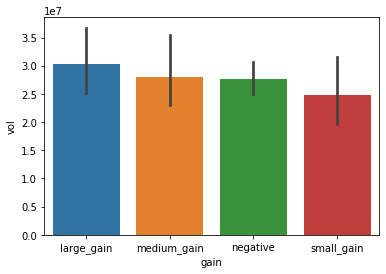

In [91]:
sns.barplot(x='gain',y='vol', data = df)

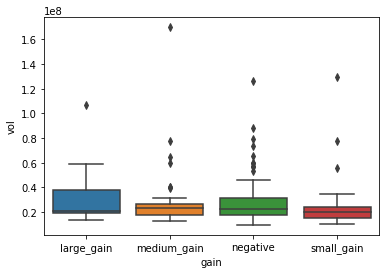

In [92]:
sns.boxplot(x='gain',y='vol', data = df)

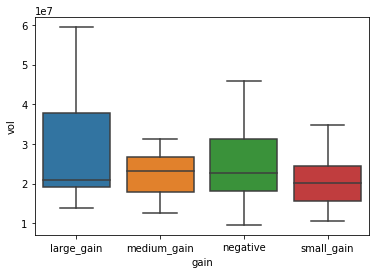

In [93]:
#Removing outliers
sns.boxplot(x='gain',y='vol', data = df, showfliers = False)

Plot the average volume over the different months

In [94]:
def get_month(row):
    return row.date.month

df['month'] = df.apply(get_month,axis = 1)

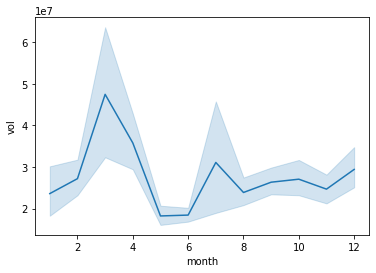

In [95]:
sns.lineplot(x='month', y = 'vol', data = df)

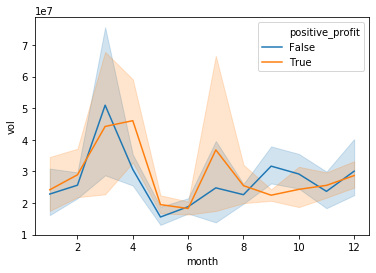

In [96]:
df['positive_profit'] = (df.profit>0)
sns.lineplot(x='month', y = 'vol', hue='positive_profit', data = df)

## Joins

We can join data frames in a similar way that we can do joins in SQL

In [97]:
data_source = 'iex'
start = datetime(2018,1,1)
end = datetime(2018,12,31)

dfb = web.DataReader('FB', data_source, start, end)
dgoog = web.DataReader('GOOG', data_source, start, end)

print(dfb.head())
print(dgoog.head())

              open    high     low   close    volume
date                                                
2018-01-02  177.68  181.58  177.55  181.42  18151903
2018-01-03  181.88  184.78  181.33  184.67  16886563
2018-01-04  184.90  186.21  184.10  184.33  13880896
2018-01-05  185.59  186.90  184.93  186.85  13574535
2018-01-08  187.20  188.90  186.33  188.28  17994726
               open     high      low    close   volume
date                                                   
2018-01-02  1048.34  1066.94  1045.23  1065.00  1237564
2018-01-03  1064.31  1086.29  1063.21  1082.48  1430170
2018-01-04  1088.00  1093.57  1084.00  1086.40  1004605
2018-01-05  1094.00  1104.25  1092.00  1102.23  1279123
2018-01-08  1102.23  1111.27  1101.62  1106.94  1047603


Perform join on the date (the index value)

In [98]:
common_dates = pd.merge(dfb,dgoog,on='date')
common_dates.head()

open_x  high_x   low_x  close_x  volume_x   open_y   high_y  \
date                                                                      
2018-01-02  177.68  181.58  177.55   181.42  18151903  1048.34  1066.94   
2018-01-03  181.88  184.78  181.33   184.67  16886563  1064.31  1086.29   
2018-01-04  184.90  186.21  184.10   184.33  13880896  1088.00  1093.57   
2018-01-05  185.59  186.90  184.93   186.85  13574535  1094.00  1104.25   
2018-01-08  187.20  188.90  186.33   188.28  17994726  1102.23  1111.27   

              low_y  close_y  volume_y  
date                                    
2018-01-02  1045.23  1065.00   1237564  
2018-01-03  1063.21  1082.48   1430170  
2018-01-04  1084.00  1086.40   1004605  
2018-01-05  1092.00  1102.23   1279123  
2018-01-08  1101.62  1106.94   1047603

Compute gain and perform join on the data AND gain

In [99]:
dfb['gain'] = dfb.apply(gainrow, axis = 1)
dgoog['gain'] = dgoog.apply(gainrow, axis = 1)
dfb['profit'] = dfb.close-dfb.open
dgoog['profit'] = dgoog.close-dgoog.open

In [100]:
common_gain_dates = pd.merge(dfb, dgoog, on=['date','gain'])
common_gain_dates.head()

open_x  high_x   low_x  close_x  volume_x        gain  profit_x  \
date                                                                          
2018-01-02  177.68  181.58  177.55   181.42  18151903  large_gain      3.74   
2018-01-04  184.90  186.21  184.10   184.33  13880896    negative     -0.57   
2018-01-09  188.70  188.80  187.10   187.87  12393057    negative     -0.83   
2018-01-11  188.40  188.40  187.38   187.77   9588587    negative     -0.63   
2018-01-16  181.50  181.75  178.04   178.39  36183842    negative     -3.11   

             open_y   high_y    low_y  close_y  volume_y  profit_y  
date                                                                
2018-01-02  1048.34  1066.94  1045.23  1065.00   1237564     16.66  
2018-01-04  1088.00  1093.57  1084.00  1086.40   1004605     -1.60  
2018-01-09  1109.40  1110.57  1101.23  1106.26    902541     -3.14  
2018-01-11  1106.30  1106.53  1099.59  1105.52    978292     -0.78  
2018-01-16  1132.51  1139.91  1117.83  1121.76   1575261    -10.75

More join examples, including left outer join

In [133]:
left = pd.DataFrame({'key': ['foo', 'foo', 'boo'], 'lval': [1, 2,3]})
print(left)
right = pd.DataFrame({'key': ['foo', 'hoo'], 'rval': [4, 5]})
print(right)
dfm = pd.merge(left, right, on='key') #keeps only the common key 'foo'
print(dfm)

   key  lval
0  foo     1
1  foo     2
2  boo     3
   key  rval
0  foo     4
1  hoo     5
   key  lval  rval
0  foo     1     4
1  foo     2     4


Left outer join

In [134]:
dfm = pd.merge(left, right, on='key', how='left') #keeps all the keys from the left and puts NaN for missing values
print(dfm)
dfm = dfm.fillna(0) #fills the NaN values with specified value
dfm

   key  lval  rval
0  foo     1   4.0
1  foo     2   4.0
2  boo     3   NaN


key  lval  rval
0  foo     1   4.0
1  foo     2   4.0
2  boo     3   0.0

## Other Pandas Classes

A DataFrame is essentially an annotated 2-D array.

Pandas also has annotated versions of 1-D and 3-D arrays.

A 1-D array in Pandas is called a **`Series`**.

A 3-D array in Pandas is called a **`Panel`**.

To use these, read the documentation!

## Comparing multiple stocks

As a last task, we will use the experience we obtained so far -- and learn some new things -- in order to compare the performance of different stocks we obtained from Yahoo finance.

In [102]:
stocks = ['FB','GOOG','TSLA', 'MSFT','NFLX']
attr = 'close'
df = web.DataReader(stocks, 
                    data_source,                               
                    start=datetime(2018, 1, 1), 
                    end=datetime(2018, 12, 31))[attr]
df.head()

Symbols         FB     GOOG   MSFT    NFLX    TSLA
date                                              
2018-01-02  181.42  1065.00  85.95  201.07  320.53
2018-01-03  184.67  1082.48  86.35  205.05  317.25
2018-01-04  184.33  1086.40  87.11  205.63  314.62
2018-01-05  186.85  1102.23  88.19  209.99  316.58
2018-01-08  188.28  1106.94  88.28  212.05  336.41

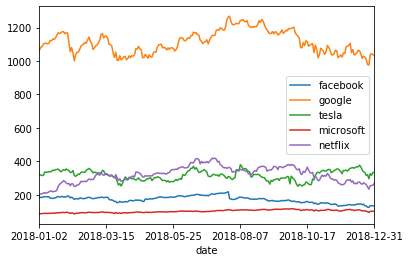

In [103]:
df.FB.plot(label = 'facebook')
df.GOOG.plot(label = 'google')
df.TSLA.plot(label = 'tesla')
df.MSFT.plot(label = 'microsoft')
df.NFLX.plot(label = 'netflix')
_ = plt.legend(loc='best')

Next, we will calculate returns over a period of length $T$, defined as:

$$r(t) = \frac{f(t)-f(t-T)}{f(t)} $$

The returns can be computed with a simple DataFrame method **`pct_change()`**.  Note that for the first $T$ timesteps, this value is not defined (of course):

In [104]:
rets = df.pct_change(30)
rets.iloc[25:35]

Symbols           FB      GOOG      MSFT      NFLX      TSLA
date                                                        
2018-02-07       NaN       NaN       NaN       NaN       NaN
2018-02-08       NaN       NaN       NaN       NaN       NaN
2018-02-09       NaN       NaN       NaN       NaN       NaN
2018-02-12       NaN       NaN       NaN       NaN       NaN
2018-02-13       NaN       NaN       NaN       NaN       NaN
2018-02-14 -0.010473  0.004413  0.056545  0.322922  0.005553
2018-02-15 -0.025505  0.006504  0.073075  0.366837  0.053018
2018-02-16 -0.037813  0.007732  0.056136  0.354472  0.066334
2018-02-20 -0.058014  0.000209  0.051366  0.326492  0.057458
2018-02-21 -0.055078  0.003975  0.036362  0.325348 -0.009245

Now we'll plot the timeseries of the returns of the different stocks.

Notice that the `NaN` values are gracefully dropped by the plotting function.

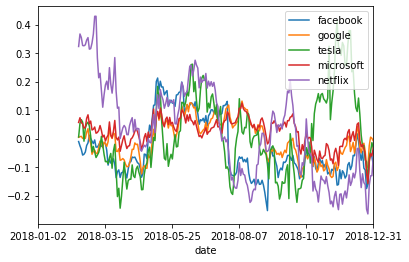

In [105]:
rets.FB.plot(label = 'facebook')
rets.GOOG.plot(label = 'google')
rets.TSLA.plot(label = 'tesla')
rets.MSFT.plot(label = 'microsoft')
rets.NFLX.plot(label = 'netflix')
_ = plt.legend(loc='best')

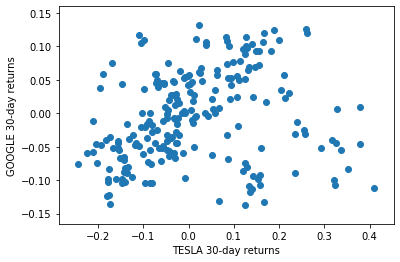

In [108]:
plt.scatter(rets.TSLA, rets.GOOG)
plt.xlabel('TESLA 30-day returns')
_ = plt.ylabel('GOOGLE 30-day returns')

We can also use the seaborn library for doing the scatterplot. Note that this method returns an object which we can use to set different parameters of the plot. In the example below we use it to set the x and y labels of the plot. Read online for more options.

Text(0, 0.5, 'GOOG profit')

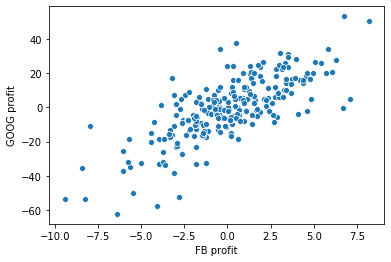

In [110]:
#Also using seaborn
fig = sns.scatterplot(dfb.profit, dgoog.profit)
fig.set_xlabel('FB profit')
fig.set_ylabel('GOOG profit')

Get all pairwise correlations in a single plot

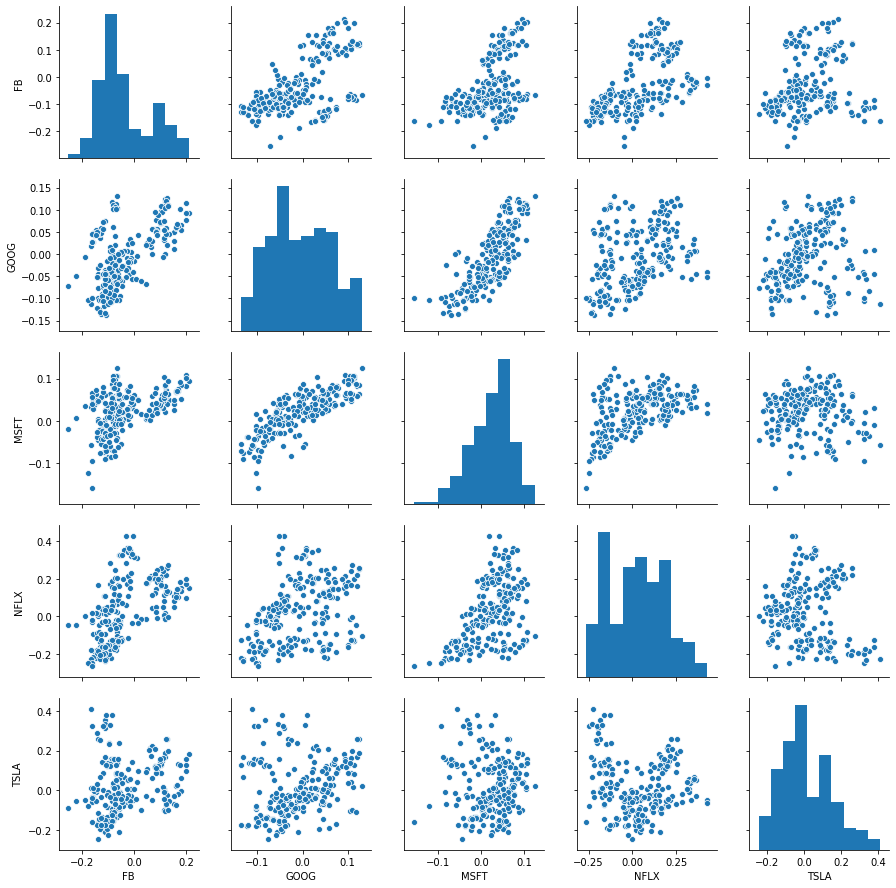

In [116]:
sns.pairplot(rets.iloc[30:])

There appears to be some (fairly strong) correlation between the movement of TSLA and YELP stocks.  Let's measure this.

The correlation coefficient between variables $X$ and $Y$ is defined as follows:

$$\text{Corr}(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X\sigma_Y}$$

Pandas provides a DataFrame method to compute the correlation coefficient of all pairs of columns: **`corr()`**.

In [111]:
rets.corr()

Symbols        FB      GOOG      MSFT      NFLX      TSLA
Symbols                                                  
FB       1.000000  0.598776  0.470696  0.546997  0.226680
GOOG     0.598776  1.000000  0.790085  0.348008  0.210441
MSFT     0.470696  0.790085  1.000000  0.489569 -0.041910
NFLX     0.546997  0.348008  0.489569  1.000000 -0.120763
TSLA     0.226680  0.210441 -0.041910 -0.120763  1.000000

In [117]:
rets.corr(method='spearman')

Symbols        FB      GOOG      MSFT      NFLX      TSLA
Symbols                                                  
FB       1.000000  0.540949  0.457852  0.641344  0.271608
GOOG     0.540949  1.000000  0.803731  0.382466  0.288135
MSFT     0.457852  0.803731  1.000000  0.456912  0.042190
NFLX     0.641344  0.382466  0.456912  1.000000 -0.065939
TSLA     0.271608  0.288135  0.042190 -0.065939  1.000000

It takes a bit of time to examine that table and draw conclusions.  

To speed that process up it helps to visualize the table.

We will learn more about visualization later, but for now this is a simple example.

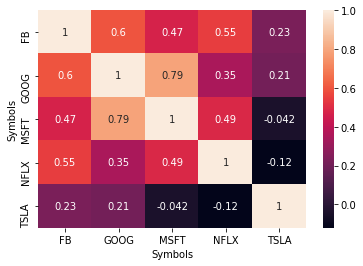

In [120]:
_ = sns.heatmap(rets.corr(), annot=True)

Use the scipy.stats library to obtain the p-values for the pearson and spearman rank correlations

In [118]:
print(stats.pearsonr(rets.iloc[30:].NFLX, rets.iloc[30:].TSLA))
print(stats.spearmanr(rets.iloc[30:].NFLX, rets.iloc[30:].TSLA))
print(stats.pearsonr(rets.iloc[30:].GOOG, rets.iloc[30:].FB))
print(stats.spearmanr(rets.iloc[30:].GOOG, rets.iloc[30:].FB))

(-0.12076314539516399, 0.07318821820546585)
SpearmanrResult(correlation=-0.065938830644713, pvalue=0.32918605296193537)
(0.5987760976044885, 6.856639483413375e-23)
SpearmanrResult(correlation=0.5409485585956174, pvalue=3.388893335195231e-18)


In [119]:
print(stats.pearsonr(dfb.profit, dgoog.profit))
print(stats.spearmanr(dfb.profit, dgoog.profit))

(0.7503012398858518, 1.18227697371417e-46)
SpearmanrResult(correlation=0.7189135370780224, pvalue=3.272074144119093e-41)


Finally, it is important to know that the plotting performed by Pandas is just a layer on top of `matplotlib` (i.e., the `plt` package).  

So Panda's plots can (and should) be replaced or improved by using additional functions from `matplotlib`.

For example, suppose we want to know both the returns as well as the standard deviation of the returns of a stock (i.e., its risk).  

Here is visualization of the result of such an analysis, and we construct the plot using only functions from `matplotlib`.

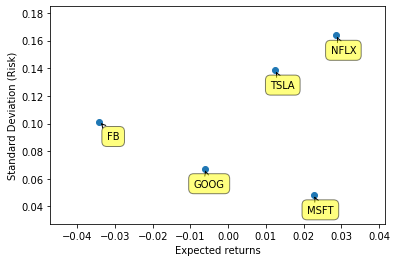

In [124]:
_ = plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard Deviation (Risk)')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

To understand what these functions are doing, (especially the `annotate` function), you will need to consult the online documentation for matplotlib.  Just use Google to find it.

## More plotting

In [125]:
df = pd.read_csv('distributions_short.csv',
                 names=list('ABCD'))
dfs = df.sort_values(by='A', ascending = True) #Sorting in data frames

Plot column B against A 

The plt.figure() command creates a new figure for each plot

<Figure size 432x288 with 0 Axes>

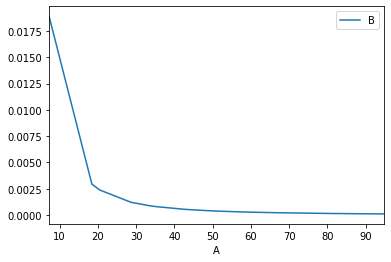

In [135]:
plt.figure(); dfs.plot(x = 'A', y = 'B');

Plot both columns B and C against A.

Clearly they are different functions

<Figure size 432x288 with 0 Axes>

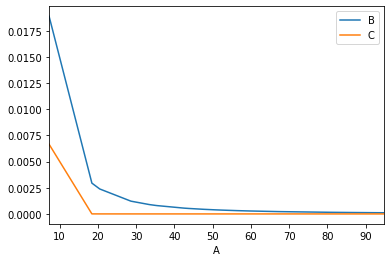

In [141]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C']);

Plot column B against A in log-log scale. 

We observe a line. So B is a polynomial function of A

<Figure size 432x288 with 0 Axes>

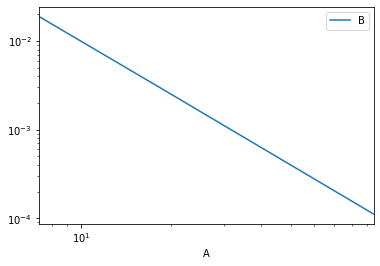

In [137]:
plt.figure(); dfs.plot(x = 'A', y = 'B', loglog=True);

Plot both columns B and C against A in log scale

<Figure size 432x288 with 0 Axes>

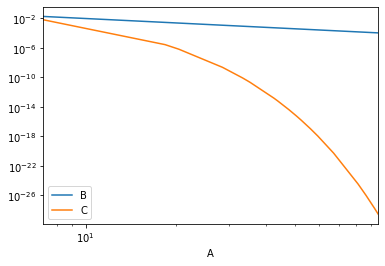

In [138]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C'], loglog=True);

Plot B and C against A, with log scale only on y-axis. 

The plot of C becomes a line, indicating that C is an exponential function of A

<Figure size 432x288 with 0 Axes>

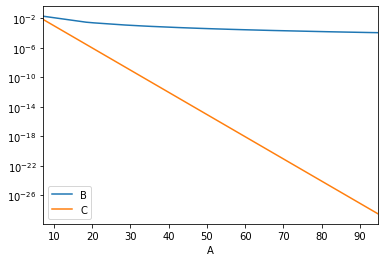

In [140]:
plt.figure(); dfs.plot(x = 'A', y = ['B','C'], logy=True);

Plotting using matlab notation

Also how to put two figures in a 1x2 grid

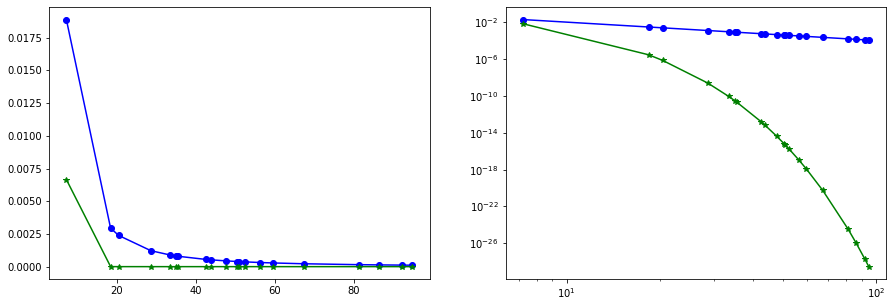

In [148]:
plt.figure(figsize = (15,5)) #defines the size of figure
plt.subplot(121) #plot with 1 row, 2 columns, 1st plot
plt.plot(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-')
plt.subplot(122)  #plot with 1 row, 2 columns, 2nd plot
plt.loglog(dfs['A'],dfs['B'],'bo-',dfs['A'],dfs['C'],'g*-')

Using seaborn

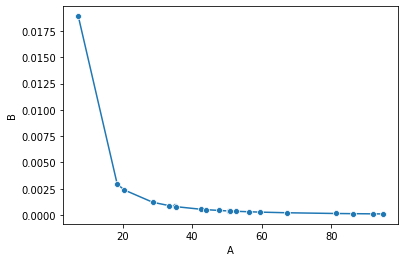

In [149]:
sns.lineplot(x= 'A', y='B',data = dfs,marker='o')

The same plots as scatter plots using the dataframe functions

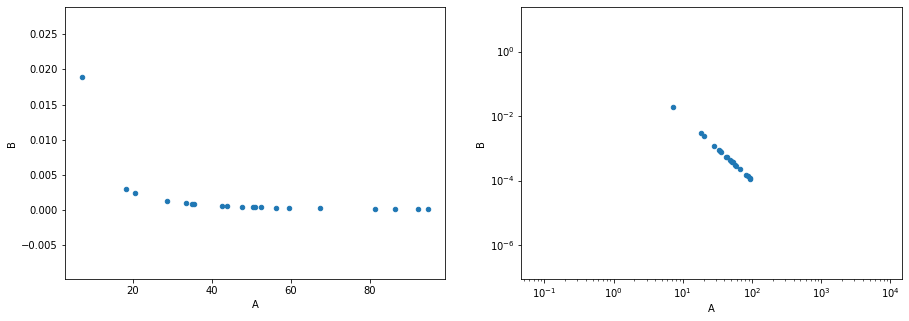

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
df.plot(kind ='scatter', x='A', y='B', ax = ax[0])
df.plot(kind ='scatter', x='A', y='B', loglog = True,ax = ax[1])

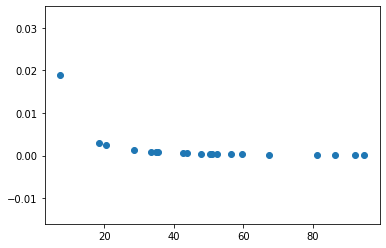

In [152]:
plt.scatter(df.A, df.B)

Putting many scatter plots into the same plot

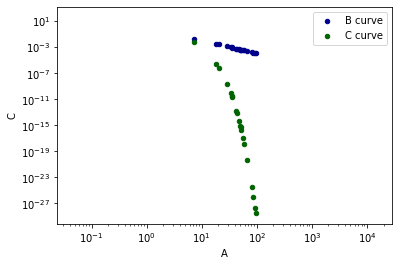

In [155]:
t = df.plot(kind='scatter', x='A', y='B', color='DarkBlue', label='B curve', loglog=True);
df.plot(kind='scatter', x='A', y='C',color='DarkGreen', label='C curve', ax=t, loglog = True);

Using seaborn

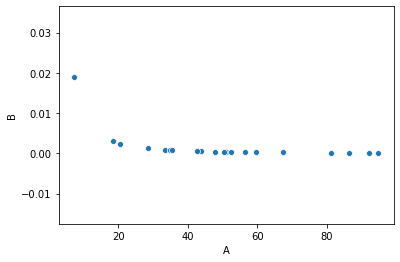

In [156]:
sns.scatterplot(x='A',y='B', data = df)

In log-log scale (for some reason it seems to throw away small values)

[None, None]

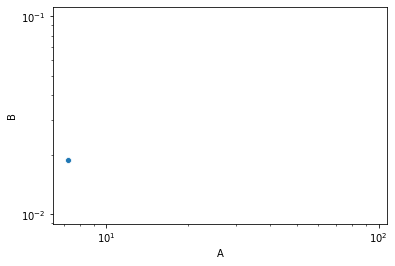

In [157]:
splot = sns.scatterplot(x='A',y='B', data = df)
splot.set(xscale="log", yscale="log")
